In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
DSP_UINT8   = 0, ///< int8_t
DSP_INT16   = 1, ///< int16_t
DSP_INT32   = 2, ///< int32_t
DSP_FLOAT32 = 3, ///< float
DSP_FLOAT64 = 4  ///< double
"""
def type_map(dtype):
    if dtype == np.uint8:
        return 0
    if dtype == np.int16:
        return 1
    if dtype == np.int32:
        return 2
    if dtype == np.float32:
        return 3
    if dtype == np.float64:
        return 4

In [4]:
F = np.asarray([
    9.11653248e-06,  2.62757708e-05,  4.43069066e-05,  4.80156199e-05,
    2.01716419e-05, -4.79548759e-05, -1.45283658e-04, -2.35415025e-04,
   -2.63132813e-04, -1.75046584e-04,  5.04629730e-05,  3.75954269e-04,
    6.95779863e-04,  8.57371305e-04,  7.14586328e-04,  1.99478220e-04,
   -6.15022433e-04, -1.49429722e-03, -2.08735128e-03, -2.03997282e-03,
   -1.14725034e-03,  5.09373347e-04,  2.50485053e-03,  4.14136149e-03,
    4.65417629e-03,  3.50427672e-03,  6.60461827e-04, -3.24704499e-03,
   -6.99668346e-03, -9.09777348e-03, -8.29994171e-03, -4.13651602e-03,
    2.69884992e-03,  1.03232756e-02,  1.60722631e-02,  1.72897964e-02,
    1.22979194e-02,  1.24128484e-03, -1.35077606e-02, -2.75994751e-02,
   -3.56412910e-02, -3.26237130e-02, -1.54598909e-02,  1.58199937e-02,
    5.76190751e-02,  1.03276147e-01,  1.44454776e-01,  1.73084041e-01,
    1.83334751e-01,  1.73084041e-01,  1.44454776e-01,  1.03276147e-01,
    5.76190751e-02,  1.58199937e-02, -1.54598909e-02, -3.26237130e-02,
   -3.56412910e-02, -2.75994751e-02, -1.35077606e-02,  1.24128484e-03,
    1.22979194e-02,  1.72897964e-02,  1.60722631e-02,  1.03232756e-02,
    2.69884992e-03, -4.13651602e-03, -8.29994171e-03, -9.09777348e-03,
   -6.99668346e-03, -3.24704499e-03,  6.60461827e-04,  3.50427672e-03,
    4.65417629e-03,  4.14136149e-03,  2.50485053e-03,  5.09373347e-04,
   -1.14725034e-03, -2.03997282e-03, -2.08735128e-03, -1.49429722e-03,
   -6.15022433e-04,  1.99478220e-04,  7.14586328e-04,  8.57371305e-04,
    6.95779863e-04,  3.75954269e-04,  5.04629730e-05, -1.75046584e-04,
   -2.63132813e-04, -2.35415025e-04, -1.45283658e-04, -4.79548759e-05,
    2.01716419e-05,  4.80156199e-05,  4.43069066e-05,  2.62757708e-05,
    9.11653248e-06
])

dump_signal("filter.bin", F, np.float32)

In [5]:
QF = np.int16((2 ** 15 - 1) * F)
dump_signal("../data/filter_16bit.bin", QF, np.int16)

In [36]:
S = np.fromfile("../data/4fsk.npbin")
S = S.reshape((S.shape[0] // 2, 2))
dump_signal("../data/signal_16bit.bin", S, np.int16)

In [37]:
res = read_signal("../data/filtered_16bit.bin", np.int16)
res = res[:, 0] + 1j  * res[:, 1]

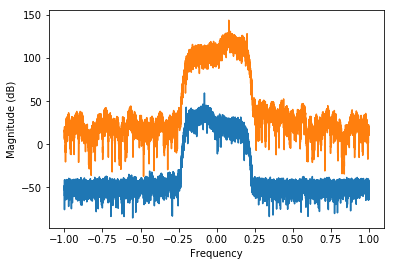

In [41]:
plt.magnitude_spectrum(res, scale='dB')
plt.magnitude_spectrum(np.convolve(S[:, 0] + 1j * S[:, 1], QF), scale='dB')
plt.show()